![title](imagens/a2.png)

# Modelo de PLN - Análisado de sentimento Tweets da United airlines

In [26]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.7.4


In [27]:
import nltk
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize

In [28]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.1.3
numpy     : 1.16.5
seaborn   : 0.9.0
nltk      : 3.4.5
matplotlib: 3.1.1
re        : 2.2.1
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]



In [29]:
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RafaelHenriqueGallo\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\RafaelHenriqueGallo\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package rslp is already up-to-date!


True

In [30]:
plt.style.use('seaborn-darkgrid')
sns.set_style("whitegrid")

In [31]:
dados = pd.read_csv("Tweets.csv", sep = ",")
dados.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [32]:
dados.shape

(14640, 15)

In [33]:
dados.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [35]:
corr = dados.corr()
corr

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


In [36]:
dados.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [37]:
dados.value_counts()

tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
569887533267611648  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHERE  Late Flight          0              @USAirways Seriously doubt that as I am still sitting inside at the gate.                                         [39.8805621, -75.23893393]   2015-02-23 07:52:30 -0800  Boston, MA      Atlantic Time (Canada)        1
567778009013178368  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith

In [38]:
dados.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [39]:
dados.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Análise explorátoria dos dados da United airlines análise de sentimento dos Tweets da United airlines

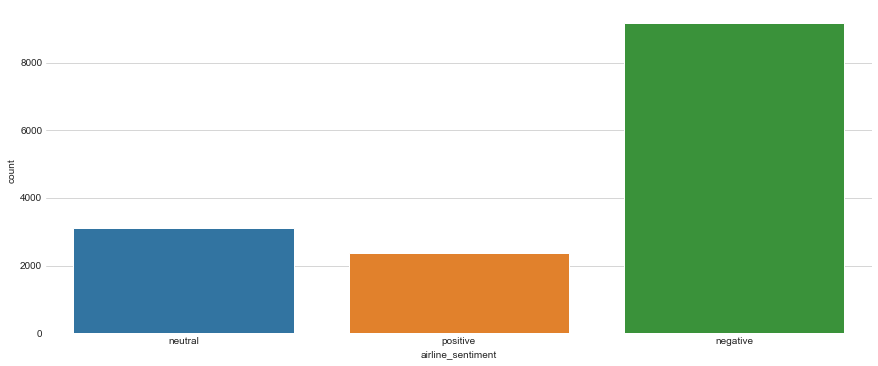

In [40]:
plt.figure(figsize=(14.8,6))
ax = sns.countplot(dados["airline_sentiment"]);

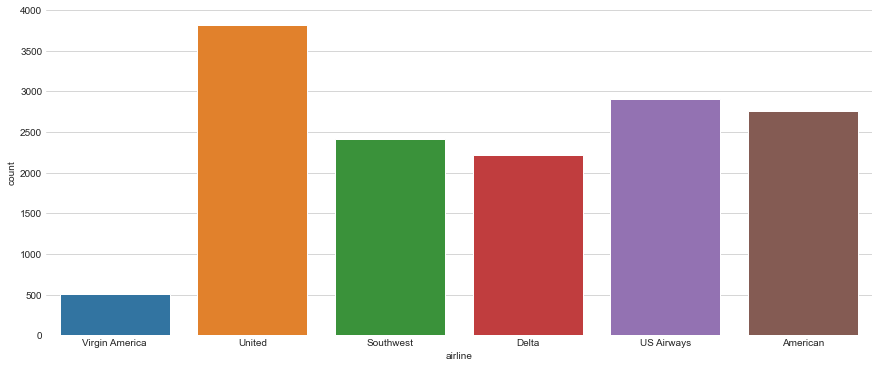

In [41]:
plt.figure(figsize=(14.8,6))

sns.countplot(dados["airline"])

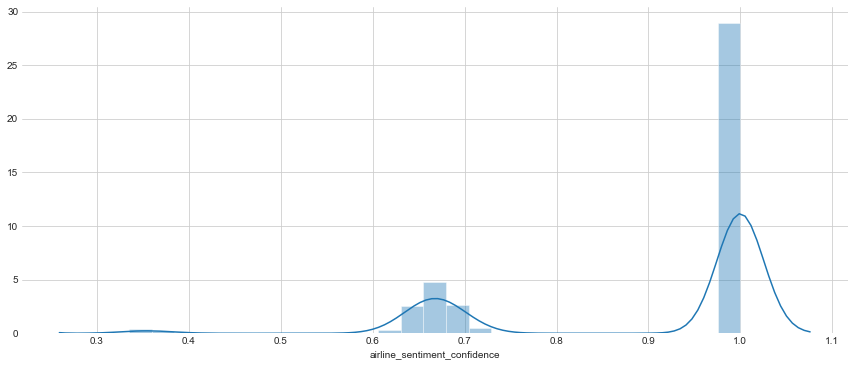

In [42]:
plt.figure(figsize=(14.8,6))

ax = sns.distplot(dados["airline_sentiment_confidence"])

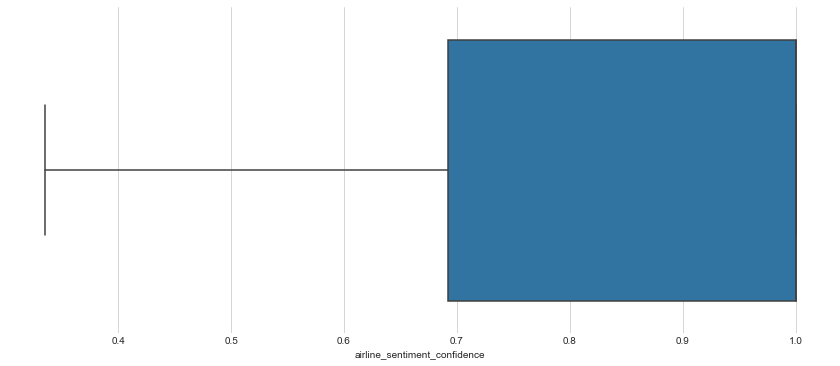

In [43]:
plt.figure(figsize=(14.8, 6))

ax = sns.boxplot(dados["airline_sentiment_confidence"])

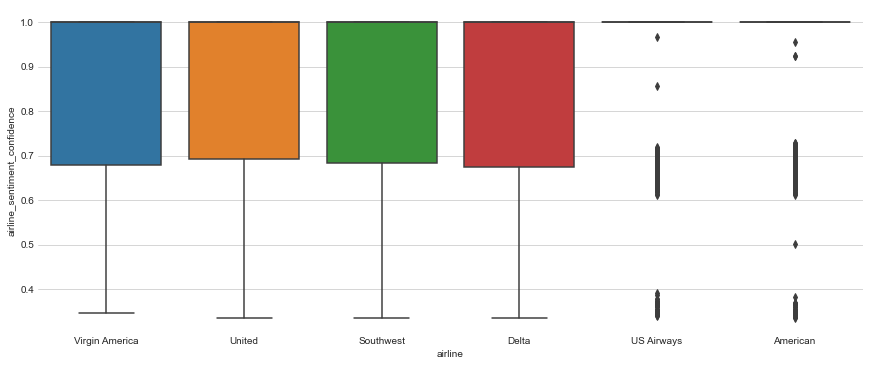

In [44]:
plt.figure(figsize=(14.8, 6))

ax = sns.boxplot(x="airline", y="airline_sentiment_confidence", data = dados)

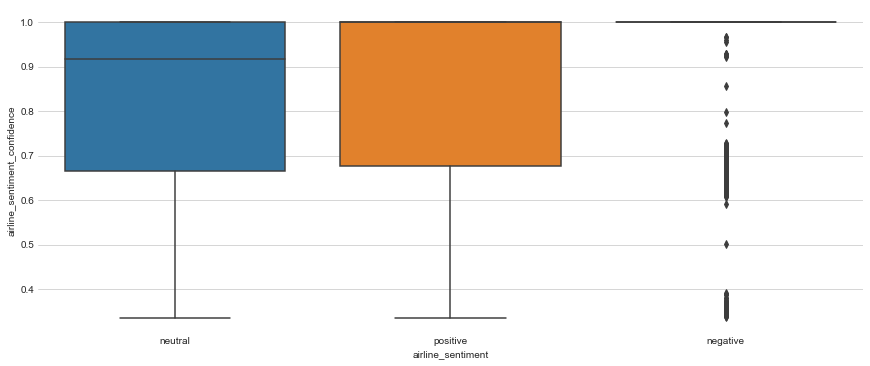

In [45]:
plt.figure(figsize=(14.8, 6))

ax = sns.boxplot(x="airline_sentiment", y="airline_sentiment_confidence", data = dados)

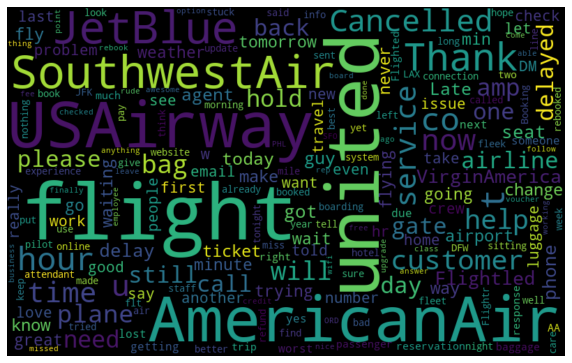

In [46]:
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in dados["text"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Pré - processamento

In [47]:
dados.text.count()

14640

In [48]:
# Dados duplicados

dados.drop_duplicates(["text"], inplace = True)
dados.text.count()

14427

In [49]:
treino = dados["text"]
teste = dados["airline_sentiment"]

In [50]:
treino.shape

(14427,)

In [51]:
teste.shape

(14427,)

In [52]:
def stopwords(inst):
    stopwords = set(nltk.corpus.stopwords.words("portuguese"))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

def stem(inst):
    stem = nltk.stem.RSLPStemmer()
    pal = []
    for x in inst.split():
        pal.append(stemmer.stem(x))
    return (" ".join(pal))

def dados_limp(inst):
    inst = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (inst)

In [53]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def Lemmatization(inst):
    pal = []
    for x in inst.split():
        pal.append(word_lemmatizer.lemmatize(x))
    return (" ".join(pal))

def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

def neg(text):
    neg = ["não", "not"]
    neg_dect = False
    
    result = []
    pal = text.split()

    for x in pal:
        x = x.lower()
        if neg_dect == True:
            x = x + "_NEG"
        if x in neg:
            neg_dect = True
        result.append(x)

    return ("".join(result))

In [54]:
treino = [Preprocessing(i) for i in treino]
treino[:20]

['@virginamerica what @dhepburn said',
 "@virginamerica plus you've added commercials to the experience tacky",
 "@virginamerica i didn't today must mean i need to take another trip!",
 "@virginamerica it's really aggressive to blast obnoxious entertainment in your guests' faces &amp they have little recourse",
 "@virginamerica and it's really big bad thing about it",
 "@virginamerica seriously would pay $30 flight seats that didn't have this playing it's really the only bad thing about flying va",
 '@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away',
 '@virginamerica really missed prime opportunity men without hats parody, there',
 "@virginamerica well, i didn't…but now i do! d",
 "@virginamerica it was amazing, and arrived an hour early you're too good to",
 '@virginamerica did you know that suicide is the second leading cause of death among teens 1024',
 '@virginamerica i &lt3 pretty graphics so much better than minimal iconography d',
 "@virginamerica thi

In [55]:
treino[:30]

['@virginamerica what @dhepburn said',
 "@virginamerica plus you've added commercials to the experience tacky",
 "@virginamerica i didn't today must mean i need to take another trip!",
 "@virginamerica it's really aggressive to blast obnoxious entertainment in your guests' faces &amp they have little recourse",
 "@virginamerica and it's really big bad thing about it",
 "@virginamerica seriously would pay $30 flight seats that didn't have this playing it's really the only bad thing about flying va",
 '@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away',
 '@virginamerica really missed prime opportunity men without hats parody, there',
 "@virginamerica well, i didn't…but now i do! d",
 "@virginamerica it was amazing, and arrived an hour early you're too good to",
 '@virginamerica did you know that suicide is the second leading cause of death among teens 1024',
 '@virginamerica i &lt3 pretty graphics so much better than minimal iconography d',
 "@virginamerica thi

In [56]:
from nltk.tokenize import word_tokenize

text = "Hoje passei no concurso eng da computação, mais teve muita gente para concurso"
word_tokenize(text)

['Hoje',
 'passei',
 'no',
 'concurso',
 'eng',
 'da',
 'computação',
 ',',
 'mais',
 'teve',
 'muita',
 'gente',
 'para',
 'concurso']

In [57]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
tokenizer.tokenize(text)

['Hoje',
 'passei',
 'no',
 'concurso',
 'eng',
 'da',
 'computação',
 ',',
 'mais',
 'teve',
 'muita',
 'gente',
 'para',
 'concurso']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", tokenizer = tokenizer.tokenize)
freq = vectorizer.fit_transform(treino)
freq
freq.shape

(14427, 15992)

## Modelo de machine learning


Algoritmo Naive bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive_fit = naive.fit(freq, teste)
naive_pred = naive.predict_proba(freq).round(2)
naive_score = naive.score(freq, teste)
print(naive_score)

print(naive.classes_)
naive_pred

0.8569349137034726
['negative' 'neutral' 'positive']


array([[0.29, 0.63, 0.08],
       [0.07, 0.02, 0.92],
       [0.79, 0.2 , 0.01],
       ...,
       [0.07, 0.91, 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import svm

pipeline = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", MultinomialNB())
])

pipeline_svm = Pipeline([
    ("counts", CountVectorizer(tokenizer=lambda text: neg(text))),
    ("classifier", svm.SVC(kernel="linear"))
])

result_pipeline = cross_val_predict(pipeline, treino, teste, cv = 10)
result_pipeline

array(['negative', 'negative', 'negative', ..., 'neutral', 'negative',
       'negative'], dtype='<U8')

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

acuracia = metrics.accuracy_score(result_pipeline, teste)
matrix = confusion_matrix(result_pipeline, teste)

In [62]:
acuracia

0.7415263048450821

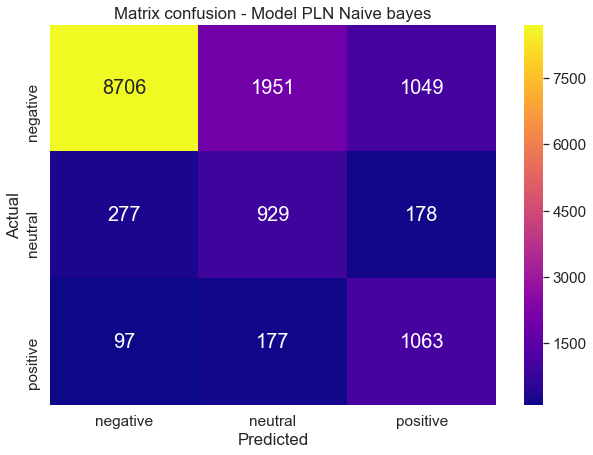

In [63]:
x = ["negative", "neutral", "positive"]
y = ['negative', "neutral", "positive"]

matrix = pd.DataFrame(matrix, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Model PLN Naive bayes")
matrix = sns.heatmap(matrix, cmap = 'plasma', annot=True, annot_kws = {"size": 20}, fmt = "")

In [64]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(teste, result_pipeline, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito   negative  neutral  positive    All
Real                                        
negative      8706      277        97   9080
neutral       1951      929       177   3057
positive      1049      178      1063   2290
All          11706     1384      1337  14427


### Testando o modelo análise de sentimento nas frases

In [65]:
text = ["Nosso governo não está bom",
        "Essa pandemia e chato",
        "Pandemia do covid19 e muito ruim",
        "A segurança desse país está deixando a desejar",
        "Nosso chefe tem mau administração na equipe",
        "Este é o tipo de filme que meus inimigos",
        "Estou espantado com a forma como este filme"]

In [66]:
# Pré-processamento dos dados
text = [Preprocessing(i) for i in text]

# Dados de testes em vetores
vet_testes = vectorizer.transform(text)

# Classificação do modelo já trainado
for t, c in zip (text, naive.predict(vet_testes)):
    print (t +", "+ c)

governo bom, neutral
pandemia chato, negative
pandemia covid19 ruim, negative
segurança desse país deixando desejar, negative
chefe mau administração equipe, negative
tipo filme inimigos, negative
espantado forma filme, negative


In [67]:
# modelo treinado a probabilidade das classe
print(naive.classes_)
naive_pred = naive.predict_proba(vet_testes).round(4)
naive_pred

['negative' 'neutral' 'positive']


array([[0.3882, 0.4197, 0.192 ],
       [0.6294, 0.2119, 0.1587],
       [0.6283, 0.1941, 0.1776],
       [0.6294, 0.2119, 0.1587],
       [0.6294, 0.2119, 0.1587],
       [0.6294, 0.2119, 0.1587],
       [0.6294, 0.2119, 0.1587]])

In [68]:
## Salvando modelo M.L PLN

import pickle
 
with open('naive_pred.pkl', 'wb') as file:
    pickle.dump(naive_pred, file)